# Exploratory Data Analysis

##### Loading the Libraries and Dataset

In [10]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Load dataset
df = pd.read_csv("../../data/tech_salary_data_CLEANED.csv")

##### Adding Axis Formatting for Visualisation

In [11]:
# Axis formatter (k = thousand, m = million)
def axis_fmt(x, pos):
    if abs(x)>=1e6: return f'{x/1e6:.1f}m'
    if abs(x)>=1e3: return f'{x/1e3:.0f}k'
    return str(int(x))
fmt = mtick.FuncFormatter(axis_fmt)

##### Details of the Dataset (No. of Rows and Columns)

In [12]:
# Show the number of rows and columns in the dataset
print(f"This Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

This Dataset contains 19,878 rows and 9 columns.


##### Column Types and Missing Values of the Dataset

In [13]:
# Show the column types and non-null counts
print("=== Columns and Data Types ===")
print(df.info(), "\n")

# Show the missing value counts
print("=== Missing Value Counts ===")
print(df.isnull().sum(), "\n")

=== Columns and Data Types ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  19878 non-null  object 
 1   title                    19878 non-null  object 
 2   totalyearlycompensation  19878 non-null  int64  
 3   yearsofexperience        19878 non-null  float64
 4   yearsatcompany           19878 non-null  float64
 5   gender                   19878 non-null  object 
 6   Race                     19878 non-null  object 
 7   Education                19878 non-null  object 
 8   country                  19878 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB
None 

=== Missing Value Counts ===
company                    0
title                      0
totalyearlycompensation    0
yearsofexperience          0
yearsatcompany             0
gender                  

##### Showing the Number of Levels/Unique Values for Categorical Variables

In [14]:
# Show the number of levels in each categorical column
print("=== Levels of Categorical Columns ===")
cat_levels = df.select_dtypes(include=['object', 'category']).nunique(dropna=False)
print(cat_levels)

=== Levels of Categorical Columns ===
company      1236
title          15
gender          2
Race            5
Education       6
country        69
dtype: int64


##### Descriptive/Summary Statistics for Numerical Variables

In [15]:
# Descriptive Statistics for Nummeric Variables
print("=== Descriptive Statistics (Numeric) ===")
print(df.describe().T, "\n")

=== Descriptive Statistics (Numeric) ===
                           count           mean           std      min  \
totalyearlycompensation  19878.0  176821.209377  88175.778315  10000.0   
yearsofexperience        19878.0       6.253597      4.757999      0.0   
yearsatcompany           19878.0       2.232443      2.294754      0.0   

                              25%       50%       75%       max  
totalyearlycompensation  113000.0  166000.0  229000.0  434000.0  
yearsofexperience             3.0       5.0       9.0      20.0  
yearsatcompany                0.0       2.0       3.0      10.0   



##### Correlation Matrix of Numerical Variables

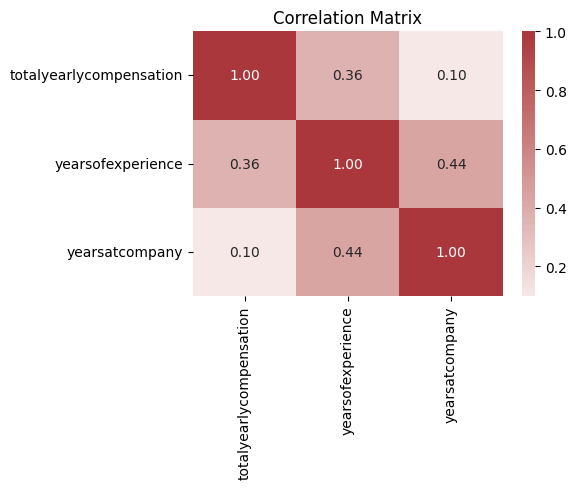

In [16]:
num_cols = [
    'totalyearlycompensation',
    'yearsofexperience', 'yearsatcompany'
]

corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="vlag", fmt=".2f", center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

##### Histograms and Boxplots of Numerical Values

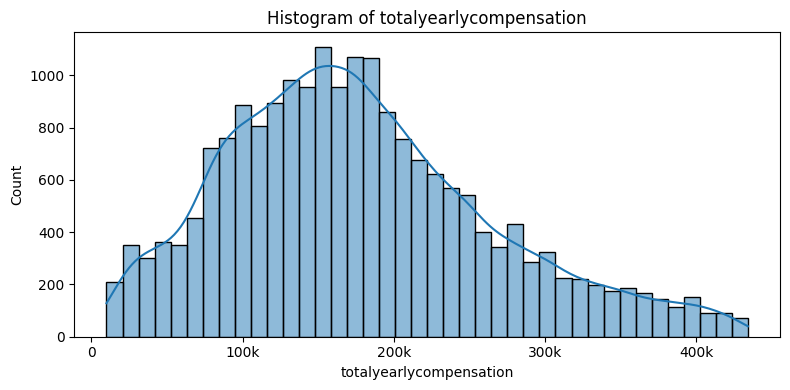

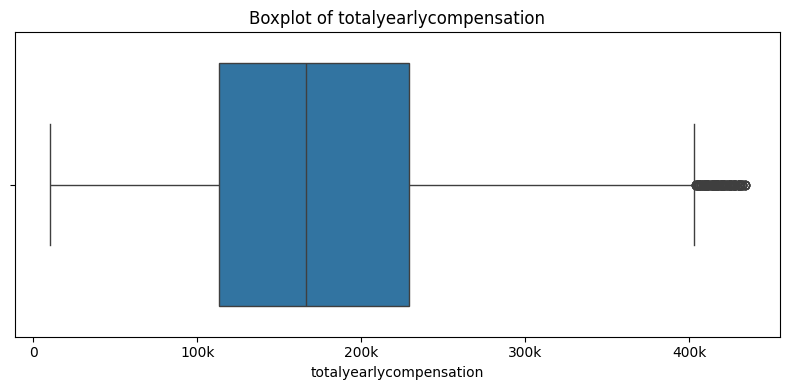

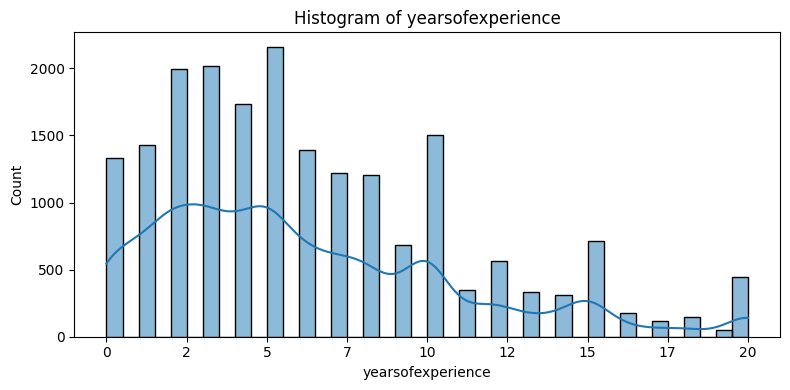

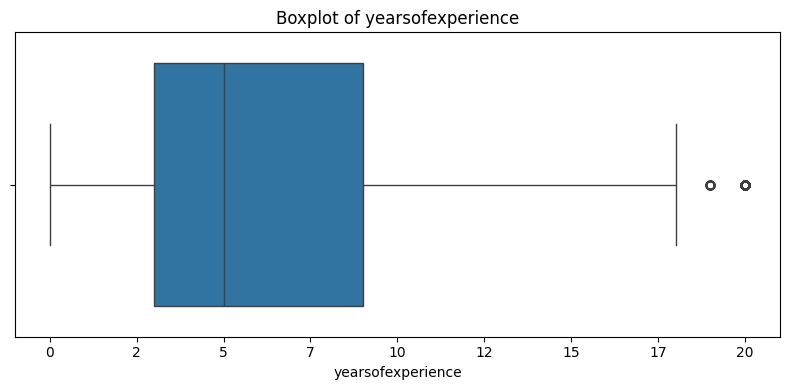

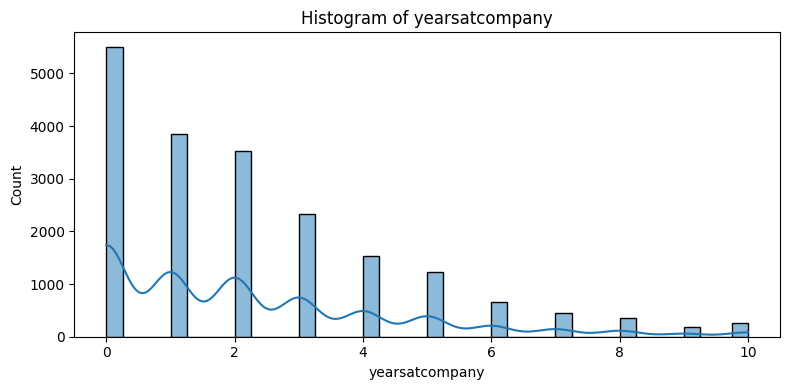

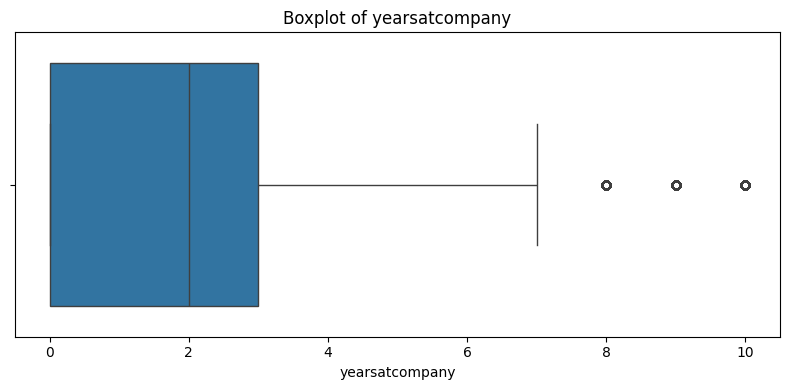

In [21]:
for col in num_cols:
    # Histograms
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.gca().xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    plt.show()

    # Boxplots
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.gca().xaxis.set_major_formatter(fmt)
    plt.tight_layout()
    plt.show()

##### Countplots for Key Categories
'level' variable is excluded as there is too many levels and inconsistencies.

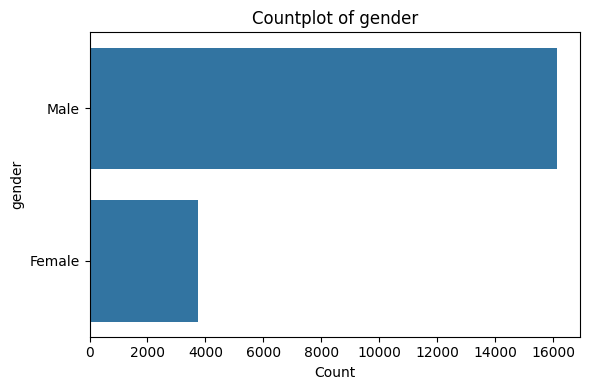

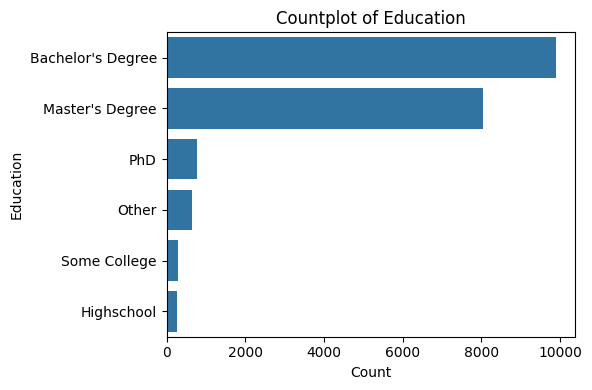

In [18]:
categorical_cols = ['gender', 'Education']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

##### Mean Total Yearly Compensation by Gender & Education

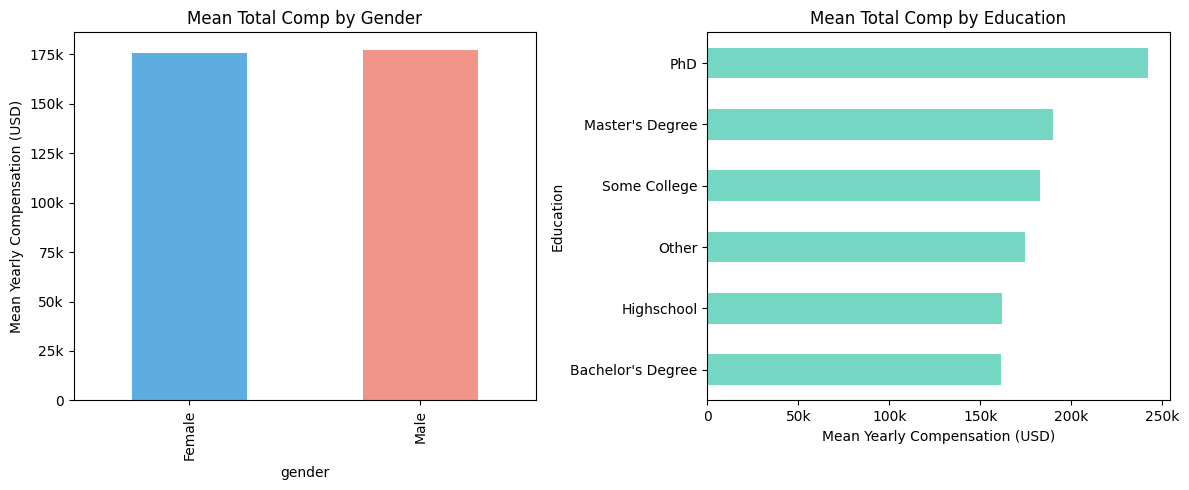

In [26]:
# Mean Total Comp by Gender & Education
fig, axes = plt.subplots(1,2, figsize=(12,5))
grp = df.groupby("gender")["totalyearlycompensation"].mean()
grp.plot.bar(ax=axes[0], color=["#5DADE2", "#F1948A", "#82E0AA"])
axes[0].set_title("Mean Total Comp by Gender")
axes[0].set_ylabel("Mean Yearly Compensation (USD)")
axes[0].yaxis.set_major_formatter(fmt)

# Calculate mean compensation by education and sort
grp2 = df.groupby("Education")["totalyearlycompensation"].mean().sort_values()

# Plot with education levels
ax1 = grp2.plot.barh(ax=axes[1], color="#76D7C4")
axes[1].set_title("Mean Total Comp by Education")
axes[1].set_ylabel("Education")
axes[1].set_xlabel("Mean Yearly Compensation (USD)")
axes[1].xaxis.set_major_formatter(fmt)  # Changed from yaxis to xaxis since it's a horizontal bar plot

# Explicitly set the y-tick labels to match the education levels
axes[1].set_yticks(range(len(grp2.index)))
axes[1].set_yticklabels(grp2.index)

plt.tight_layout()
plt.show()

##### Boxplot of Total Year Compensation by Gender

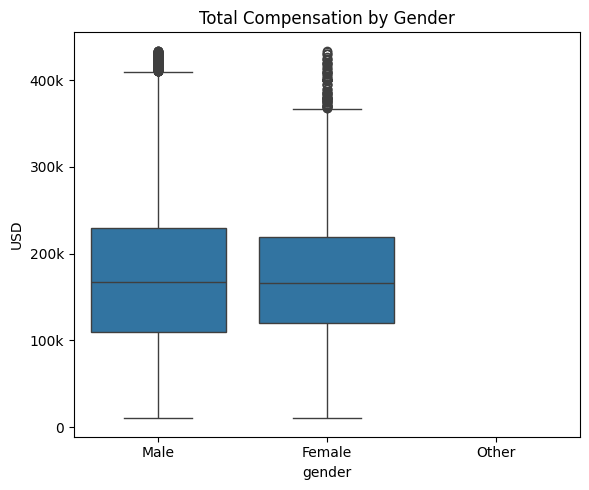

In [20]:
# Total Year Comp by Gender
plt.figure(figsize=(6,5))
sns.boxplot(x="gender", y="totalyearlycompensation", data=df,
            order=["Male", "Female", "Other"])
plt.title("Total Compensation by Gender")
plt.ylabel("USD")
plt.gca().yaxis.set_major_formatter(fmt)
plt.tight_layout()
plt.show()